# Web Scrapping & EDA 
### Pavan Kumar G

### DS16

## Introduction


Many times in real life we have to get information from the web pages which may be in a different format such as text and tables. To complete this project you have to scrape population data from Worldmeters website (url given). There is only one table on the web page which you have to scrape. 

URL= https://www.worldometers.info/world-population/population-by-country/

Countries in the world by population (2022)

This list includes both countries and dependent territories. Data based on the latest United Nations Population Division estimates. 

### Attribute Information:

1. Country (or dependency): 
This column contains different country's name (235 countries)

2. Population (2020): 
This columns contains the population of different countries

3. Yearly Change: 
This columns contains the population change by yearly

4. Net Change: 
This columns contains the net change of the population

5. Density (P/Km²): 
The column contains the density of the population

6. Land Area (Km²): 
This column contain the land area in terms of kilometer square

7. Migrants (net): 
This column represents the migrants of the countries

8. Fert. Rate: 
This column represents the fertility or the growth rate of individual countries

9. Med. Age: 
This column represents the median age (Middle Age or the average age) lifespan of the country

10. Urban Pop %: 
This column represents the urban population

11. World Share: 
This column represents the population contributed to the world's share by individual country




###  Scraping the table using beautiful soup

In [33]:
pip install requests #installing requests

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


In [34]:
pip install bs4 #installing bs4

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


In [35]:
pip install lxml #installing lxml

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


### Importing necessary libraries

In [4]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
URL = "https://www.worldometers.info/world-population/population-by-country/"
page = requests.get(URL)

#scrapping html data
soup = BeautifulSoup(page.text, 'lxml')
soup

#scrapping only table


table = soup.find('table', {'id':'example2' })
headers = []

#scrapping colomn names
for i in table.find_all('th'):
    title = i.text
    headers.append(title)

#parsng in to dataframe
df = pd.DataFrame(columns = headers)

#scrappin data inside the table
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(df)
    df.loc[length]= row_data    

In [6]:
df
# displaying dataset

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


## Performing basic cleaning operations

In [7]:
df.describe()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235,235,235,235,235,235,235,235,235,235,235,235
unique,235,235,235,174,234,165,226,159,51,35,81,74
top,1,China,"1,439,323,776",1.48 %,68,25,460,,N.A.,N.A.,N.A.,0.00 %
freq,1,1,1,4,2,8,3,34,34,34,13,56


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    object
 1   Country (or dependency)  235 non-null    object
 2   Population (2020)        235 non-null    object
 3   Yearly Change            235 non-null    object
 4   Net Change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           235 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med. Age                 235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: object(12)
memory usage: 23.9+ KB


In [9]:
df.dtypes

#                          object
Country (or dependency)    object
Population (2020)          object
Yearly Change              object
Net Change                 object
Density (P/Km²)            object
Land Area (Km²)            object
Migrants (net)             object
Fert. Rate                 object
Med. Age                   object
Urban Pop %                object
World Share                object
dtype: object

##  Number of Rows and Columns in Data set

In [10]:
df.shape

(235, 12)

##  Checking for any missing value in the dataset

In [11]:
df.isna().sum()

#                          0
Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

#### Though there are null values, we see 0 null values because of the wrong format of the null values.

## Renaming the neccessary columns in the Data set

In [12]:
df.rename(columns = {'Fert. Rate':'Fertility Rate', 'Med. Age':'Median age', 'Urban Pop %':'Urban Population %'}, inplace = True)

### Here we could see that, there are punctuation marks in between the data, so we have to remove those to convert into required datatypes

In [13]:
#replacing ("N.A.") values as Nan to count as null
df['Median age'] = df['Median age'].replace(to_replace='N.A.', value=np.NaN)
df['Fertility Rate'] = df['Fertility Rate'].replace(to_replace='N.A.', value=np.NaN)

In [14]:
#removin noise
df['Population (2020)'] = df['Population (2020)'].str.replace(r',', '')
df['Net Change'] = df['Net Change'].str.replace(r',', '')
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(r',', '')
df['Migrants (net)'] = df['Migrants (net)'].str.replace(r',', '')
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(r',', '')
df['Density (P/Km²)'] = df['Density (P/Km²)'].str.replace(r',', '')
df['Yearly Change'] = df['Yearly Change'].str.replace(r',','%')

In [15]:
#converting data types
df['Population (2020)'] = df['Population (2020)'].astype(int)
df['Net Change'] = df['Net Change'].astype(float)
df['Land Area (Km²)'] = df['Land Area (Km²)'].astype(float)
df['Density (P/Km²)'] = df['Density (P/Km²)'].astype(float)
df['Median age'] = df['Median age'].astype(float)
df['Fertility Rate'] = df['Fertility Rate'].astype(float)

In [16]:
df.head(10)

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fertility Rate,Median age,Urban Population %,World Share
0,1,China,1439323776,0.39 %,5540090.0,153.0,9388211.0,-348399,1.7,38.0,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631.0,464.0,2973190.0,-532687,2.2,28.0,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734.0,36.0,9147420.0,954806,1.8,38.0,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047.0,151.0,1811570.0,-98955,2.3,30.0,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022.0,287.0,770880.0,-233379,3.6,23.0,35 %,2.83 %
5,6,Brazil,212559417,0.72 %,1509890.0,25.0,8358140.0,21200,1.7,33.0,88 %,2.73 %
6,7,Nigeria,206139589,2.58 %,5175990.0,226.0,910770.0,-60000,5.4,18.0,52 %,2.64 %
7,8,Bangladesh,164689383,1.01 %,1643222.0,1265.0,130170.0,-369501,2.1,28.0,39 %,2.11 %
8,9,Russia,145934462,0.04 %,62206.0,9.0,16376870.0,182456,1.8,40.0,74 %,1.87 %
9,10,Mexico,128932753,1.06 %,1357224.0,66.0,1943950.0,-60000,2.1,29.0,84 %,1.65 %


## The top ten and bottom ten countries based on the density column.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        235 non-null    int32  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    float64
 5   Density (P/Km²)          235 non-null    float64
 6   Land Area (Km²)          235 non-null    float64
 7   Migrants (net)           235 non-null    object 
 8   Fertility Rate           201 non-null    float64
 9   Median age               201 non-null    float64
 10  Urban Population %       235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 22.9+ KB


## Now we can see null vaues

In [18]:
df.isna().sum()

#                           0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)              0
Fertility Rate             34
Median age                 34
Urban Population %          0
World Share                 0
dtype: int64

In [19]:
grp = df.groupby(('Country (or dependency)')).agg({'Density (P/Km²)':'sum'})
grp= grp.reset_index()
grp

,Country (or dependency),Density (P/Km²)
0,Afghanistan,60.0
1,Albania,105.0
2,Algeria,18.0
3,American Samoa,276.0
4,Andorra,164.0
...,...,...
230,Wallis & Futuna,80.0
231,Western Sahara,2.0
232,Yemen,56.0
233,Zambia,25.0


In [20]:
sr_grp = grp.sort_values(by='Density (P/Km²)',ascending=True)
sr_grp

,Country (or dependency),Density (P/Km²)
69,Falkland Islands,0.0
82,Greenland,0.0
231,Western Sahara,2.0
137,Mongolia,2.0
143,Namibia,3.0
...,...,...
80,Gibraltar,3369.0
93,Hong Kong,7140.0
187,Singapore,8358.0
121,Macao,21645.0


### Top10 countries countries based on density column

In [21]:
sr_grp.head(10)

,Country (or dependency),Density (P/Km²)
69,Falkland Islands,0.0
82,Greenland,0.0
231,Western Sahara,2.0
137,Mongolia,2.0
143,Namibia,3.0
95,Iceland,3.0
11,Australia,3.0
117,Libya,4.0
36,Canada,4.0
26,Botswana,4.0


### Bottom 10 countries countries based on density column

In [22]:
sr_grp.tail(10)

,Country (or dependency),Density (P/Km²)
16,Bangladesh,1265.0
127,Malta,1380.0
125,Maldives,1802.0
91,Holy See,2003.0
15,Bahrain,2239.0
80,Gibraltar,3369.0
93,Hong Kong,7140.0
187,Singapore,8358.0
121,Macao,21645.0
136,Monaco,26337.0


In [23]:
grp1 = df.groupby(('Country (or dependency)')).agg({'Fertility Rate':'sum'})
grp1= grp1.reset_index()
grp1

,Country (or dependency),Fertility Rate
0,Afghanistan,4.6
1,Albania,1.6
2,Algeria,3.1
3,American Samoa,0.0
4,Andorra,0.0
...,...,...
230,Wallis & Futuna,0.0
231,Western Sahara,2.4
232,Yemen,3.8
233,Zambia,4.7


In [24]:
grp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Fertility Rate           235 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


##  Country which has the highest fertility rate and country which has the lowest fertility rate

In [25]:
sr_grp1 = grp1.sort_values(by='Fertility Rate',ascending=True)
sr_grp1

,Country (or dependency),Fertility Rate
91,Holy See,0.0
144,Nauru,0.0
139,Montserrat,0.0
28,British Virgin Islands,0.0
136,Monaco,0.0
...,...,...
40,Chad,5.8
126,Mali,5.9
55,DR Congo,6.0
192,Somalia,6.1


### Top 10 countries countries based on Fertility Rate

In [26]:
sr_grp1a = grp1.sort_values(by='Fertility Rate',ascending=False)
sr_grp1a.head(10)

,Country (or dependency),Fertility Rate
150,Niger,7.0
192,Somalia,6.1
55,DR Congo,6.0
126,Mali,5.9
40,Chad,5.8
5,Angola,5.6
32,Burundi,5.5
151,Nigeria,5.4
76,Gambia,5.3
31,Burkina Faso,5.2


### Bottom 10 countries countries based on Fertility Rate

In [27]:
sr_grp1.head(10)

,Country (or dependency),Fertility Rate
91,Holy See,0.0
144,Nauru,0.0
139,Montserrat,0.0
28,British Virgin Islands,0.0
136,Monaco,0.0
217,Turks and Caicos,0.0
128,Marshall Islands,0.0
37,Caribbean Netherlands,0.0
38,Cayman Islands,0.0
118,Liechtenstein,0.0


# Top 5 largest countries in this word based on land area.

In [30]:
grp2 = df.groupby(('Country (or dependency)')).agg({'Land Area (Km²)':'sum'})
grp2= grp2.reset_index()
grp2

,Country (or dependency),Land Area (Km²)
0,Afghanistan,652860.0
1,Albania,27400.0
2,Algeria,2381740.0
3,American Samoa,200.0
4,Andorra,470.0
...,...,...
230,Wallis & Futuna,140.0
231,Western Sahara,266000.0
232,Yemen,527970.0
233,Zambia,743390.0


In [31]:
sr_grp2 = grp2.sort_values(by='Land Area (Km²)',ascending=False)
sr_grp2

,Country (or dependency),Land Area (Km²)
170,Russia,16376870.0
43,China,9388211.0
224,United States,9147420.0
36,Canada,9093510.0
27,Brazil,8358140.0
...,...,...
144,Nauru,20.0
80,Gibraltar,10.0
211,Tokelau,10.0
136,Monaco,1.0


In [32]:
sr_grp2.head(10)

,Country (or dependency),Land Area (Km²)
170,Russia,16376870.0
43,China,9388211.0
224,United States,9147420.0
36,Canada,9093510.0
27,Brazil,8358140.0
11,Australia,7682300.0
96,India,2973190.0
8,Argentina,2736690.0
107,Kazakhstan,2699700.0
2,Algeria,2381740.0


# Report of top 5 countries in this word based on median value.

In [31]:
grp4 = df.groupby(('Country (or dependency)')).agg({'Median age':'mean'})
grp4= grp4.reset_index()
grp4

,Country (or dependency),Median age
0,Afghanistan,18.0
1,Albania,36.0
2,Algeria,29.0
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
230,Wallis & Futuna,NaN
231,Western Sahara,28.0
232,Yemen,20.0
233,Zambia,18.0


In [32]:
sr_grp4 = grp4.sort_values(by='Median age',ascending=False)
sr_grp4.head(5)

,Country (or dependency),Median age
105,Japan,48.0
129,Martinique,47.0
103,Italy,47.0
81,Greece,46.0
166,Portugal,46.0


In [33]:
sr_grp4 = grp4.sort_values(by='Median age',ascending=True)
sr_grp4.head(5)

,Country (or dependency),Median age
150,Niger,15.0
126,Mali,16.0
220,Uganda,17.0
32,Burundi,17.0
5,Angola,17.0


# Sorting the population column based on lowest populated countries

In [34]:
grp3 = df.groupby(('Country (or dependency)')).agg({'Population (2020)':'sum'})
grp3= grp3.reset_index()
grp3

,Country (or dependency),Population (2020)
0,Afghanistan,38928346
1,Albania,2877797
2,Algeria,43851044
3,American Samoa,55191
4,Andorra,77265
...,...,...
230,Wallis & Futuna,11239
231,Western Sahara,597339
232,Yemen,29825964
233,Zambia,18383955


In [35]:
sr_grp3 = grp3.sort_values(by='Population (2020)',ascending=True)
sr_grp3

,Country (or dependency),Population (2020)
96,India,0
91,Holy See,801
211,Tokelau,1357
152,Niue,1626
69,Falkland Islands,3480
...,...,...
27,Brazil,212559417
158,Pakistan,220892340
97,Indonesia,273523615
224,United States,331002651


In [36]:
sr_grp3.head(10) #top 10 lowest populated countries

,Country (or dependency),Population (2020)
96,India,0
91,Holy See,801
211,Tokelau,1357
152,Niue,1626
69,Falkland Islands,3480
139,Montserrat,4992
178,Saint Pierre & Miquelon,5794
174,Saint Helena,6077
173,Saint Barthelemy,9877
144,Nauru,10824


In [37]:
#top 10 highest populated countries

sr_grp3 = grp3.sort_values(by='Population (2020)',ascending=False)
sr_grp3.head(10)

,Country (or dependency),Population (2020)
43,China,1439323776
224,United States,331002651
97,Indonesia,273523615
158,Pakistan,220892340
27,Brazil,212559417
151,Nigeria,206139589
16,Bangladesh,164689383
170,Russia,145934462
133,Mexico,128932753
105,Japan,126476461


## Creating appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change

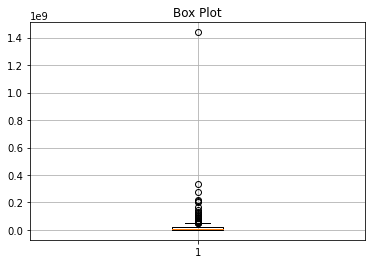

In [38]:
plt.boxplot(df["Population (2020)"])
plt.title("Box Plot")
plt.grid(True)
plt.show()